In [1]:
import pandas_profiling as pp
# Importing Packages
import pandas as pd#data analysis
import numpy as np#numerical python
import matplotlib.pyplot as plt#visualization the plots
import seaborn as sns#visualiztion plot
import os#use for directory of the system
os.chdir(r"C:\machine learning\test")

In C:\Users\Aksha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Aksha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Aksha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Aksha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Aksha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [3]:
df=pd.read_csv("Vendor_Data.csv")

In [4]:
df.columns

Index(['Products', 'Avg_Price_per_unit', 'Cost_per_unit',
       'Average_Profit_per_unit', 'Average_units_sold',
       'Incremental_acquisition', 'Increase_sale_volume'],
      dtype='object')

Case Study in Python
Suppose, you are the owner of an online grocery store. You sell 250 products online. A conventional methodology has been applied to determine the price of each product. And, the methodology is very simple – price the product at par with the market price of the product.

You plan to leverage analytics to determine pricing to maximize the revenue earned.

Out of 100000 people who visit your website, only 5000 end up purchasing your products. 
Now, all those who made a purchase, you have obtained their buying patterns, including their average unit purchased etc.

To understand the impact of price variations, you tried testing different price points for each product. You got astonished by the results. 
The impact can be broken down into two aspects:

 A lower price point increases the volume of the purchased product.
Customers compare price points of a few products more than others, to make a decision whether to buy products from your portal or not.

For instance, Product 1 might be a frequently used product. If you decrease the price point of product 1, then the customer response rate which was initially 5% goes up to 5.2% over and above the fact that the customer will purchase more of product 1.

On the other hand, decrease in product price obviously decreases the margin of the product.
Now, you want to find the optimum price points for each of the product to maximize the total profit earned. In this case study, you are provided with a table with all 250 items :

Following are the variables available in the data set: dataset attached (Vendor_Data)

Average Price/Unit : Market price of the product
Cost/Unit : Current cost of the product

Average Profit/Unit : Profit for each unit

Average units sold : Average number of units of product sold to a customer who makes a purchase

Incremental acquisition : For every 10% decline in unit price, this is the increase in total customer response rate. 

Note that overall response rate initially is 5% (5000 out of 100000 make a purchase). You are allowed to decrease the price of a product maximum by 10% by market laws.

Increase in sale volume : For every 10% decline in unit price of product, this is the increase in volume. Again, you are allowed to decrease the price of a product maximum by 10% by market laws.
Note: The maximum price hike permitted is 20%. So, basically the price of a product can be varied between -10% to +20% around the average price/unit.
If you make the calculation of the profit earned per customer who comes to your portal:
Total Profit Earned: $165
Solve this case study by an analytical approach using Python. Let’s do it!


In [5]:
df.head()

,Products,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
0,Product 1,95,92,2.8,0.6,0.00323,0.08906
1,Product 2,37,27,10.0,0.8,0.00106,0.01991
2,Product 3,34,26,8.5,0.6,0.00328,0.03778
3,Product 4,32,30,2.8,0.7,0.00000,0.08562
4,Product 5,62,45,16.0,1.0,0.00079,0.02637


In [6]:
df.shape

(250, 7)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Products                 250 non-null    object 
 1   Avg_Price_per_unit       250 non-null    int64  
 2   Cost_per_unit            250 non-null    int64  
 3   Average_Profit_per_unit  250 non-null    float64
 4   Average_units_sold       250 non-null    float64
 5   Incremental_acquisition  250 non-null    float64
 6   Increase_sale_volume     250 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 13.8+ KB


In [7]:
df.isna().sum()#no missing values in the data

Products                   0
Avg_Price_per_unit         0
Cost_per_unit              0
Average_Profit_per_unit    0
Average_units_sold         0
Incremental_acquisition    0
Increase_sale_volume       0
dtype: int64

In [8]:
pp.ProfileReport(df)#profile report of the data

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#create a function values count per column
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [10]:
df.columns

Index(['Products', 'Avg_Price_per_unit', 'Cost_per_unit',
       'Average_Profit_per_unit', 'Average_units_sold',
       'Incremental_acquisition', 'Increase_sale_volume'],
      dtype='object')

In [11]:
count_values_in_column(df,"Products")

,Total,Percentage
Product 146,1,0.4
Product 6,1,0.4
Product 87,1,0.4
Product 86,1,0.4
Product 211,1,0.4
...,...,...
Product 180,1,0.4
Product 85,1,0.4
Product 244,1,0.4
Product 94,1,0.4


In [12]:
df.describe()

,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,60.620000,51.596000,9.034400,1.500400,0.001366,0.050986
std,28.318959,24.182223,7.433913,0.839511,0.001579,0.029084
min,10.000000,9.000000,0.000000,0.100000,0.000000,0.000370
25%,37.000000,32.000000,3.100000,0.800000,0.000000,0.025528
50%,57.000000,50.500000,7.150000,1.400000,0.000690,0.051620
75%,85.750000,71.750000,12.975000,2.200000,0.002560,0.076580
max,110.000000,105.000000,29.700000,3.100000,0.006150,0.099430


In [29]:
df.columns

Index(['Products', 'Avg_Price_per_unit', 'Cost_per_unit',
       'Average_Profit_per_unit', 'Average_units_sold',
       'Incremental_acquisition', 'Increase_sale_volume'],
      dtype='object')

In [36]:
max_pr=df.groupby(["Products"])["Avg_Price_per_unit"].agg(["max"]).reset_index()
max_pr

,Products,max
0,Product 1,95
1,Product 10,108
2,Product 100,66
3,Product 101,46
4,Product 102,107
...,...,...
245,Product 95,35
246,Product 96,86
247,Product 97,87
248,Product 98,56


In [37]:
max_pr.columns

Index(['Products', 'max'], dtype='object')

In [39]:
prod_max=max_pr.nlargest(columns=["max"],n=5)
prod_max

,Products,max
5,Product 103,110
21,Product 118,110
188,Product 43,110
203,Product 57,110
240,Product 90,110


<AxesSubplot:xlabel='Products', ylabel='max'>

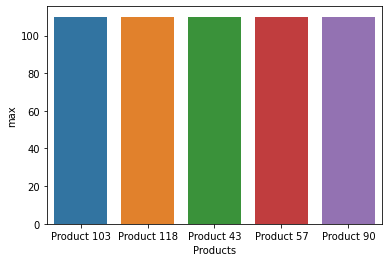

In [28]:
sns.barplot(x=prod_max["Products"],y=prod_max["max"])

In [ ]:
#top 5 products name where average price per unit

In [40]:
df.columns

Index(['Products', 'Avg_Price_per_unit', 'Cost_per_unit',
       'Average_Profit_per_unit', 'Average_units_sold',
       'Incremental_acquisition', 'Increase_sale_volume'],
      dtype='object')

In [41]:
max_pr=df.groupby(["Products"])["Cost_per_unit"].agg(["max"]).reset_index()
max_pr

,Products,max
0,Product 1,92
1,Product 10,94
2,Product 100,53
3,Product 101,39
4,Product 102,84
...,...,...
245,Product 95,32
246,Product 96,73
247,Product 97,62
248,Product 98,50


In [42]:
prod_max=max_pr.nlargest(columns=["max"],n=5)
prod_max

,Products,max
5,Product 103,105
188,Product 43,104
191,Product 46,101
23,Product 12,99
93,Product 183,99


<AxesSubplot:xlabel='Products', ylabel='max'>

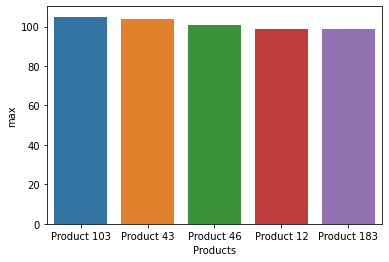

In [43]:
sns.barplot(x=prod_max["Products"],y=prod_max["max"])

In [44]:
df.columns

Index(['Products', 'Avg_Price_per_unit', 'Cost_per_unit',
       'Average_Profit_per_unit', 'Average_units_sold',
       'Incremental_acquisition', 'Increase_sale_volume'],
      dtype='object')

In [ ]:
#top 5 avg profit per unit in which products


In [45]:
max_pr=df.groupby(["Products"])["Average_Profit_per_unit"].agg(["max"]).reset_index()
max_pr

,Products,max
0,Product 1,2.8
1,Product 10,14.3
2,Product 100,12.6
3,Product 101,7.5
4,Product 102,22.6
...,...,...
245,Product 95,3.5
246,Product 96,13.0
247,Product 97,24.8
248,Product 98,6.1


In [46]:
prod_max=max_pr.nlargest(columns=["max"],n=5)
prod_max

,Products,max
133,Product 219,29.7
149,Product 233,28.7
217,Product 7,28.1
117,Product 204,27.9
53,Product 147,26.9


<AxesSubplot:xlabel='Products', ylabel='max'>

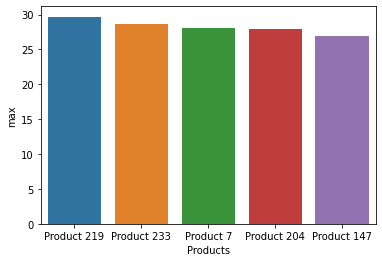

In [47]:
sns.barplot(x=prod_max["Products"],y=prod_max["max"])

In [48]:
df.columns

Index(['Products', 'Avg_Price_per_unit', 'Cost_per_unit',
       'Average_Profit_per_unit', 'Average_units_sold',
       'Incremental_acquisition', 'Increase_sale_volume'],
      dtype='object')

C:\Users\Aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cost_per_unit', ylabel='Avg_Price_per_unit'>

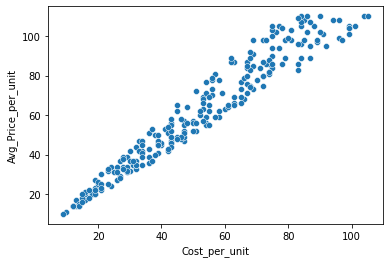

In [49]:
sns.scatterplot(df["Cost_per_unit"],df["Avg_Price_per_unit"])

C:\Users\Aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cost_per_unit', ylabel='Average_Profit_per_unit'>

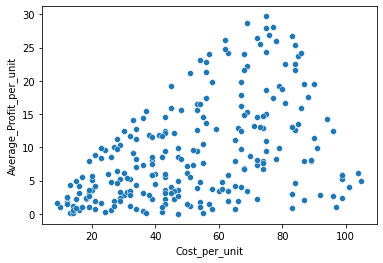

In [50]:
sns.scatterplot(df["Cost_per_unit"],df["Average_Profit_per_unit"])

In [ ]:
#we have to see in the data cost of per unit of product rise then avg. price of per unit also rises
#we have to see that in thre data cost of per unit and avg profit has direct relation of some units of product

<AxesSubplot:>

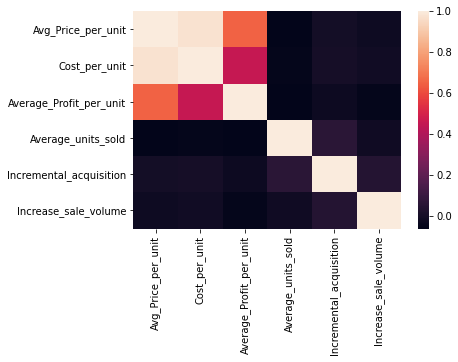

In [52]:
sns.heatmap(df.corr())

In [53]:
df.corr()

,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
Avg_Price_per_unit,1.000000,0.972030,0.650154,-0.063240,-0.008513,-0.025802
Cost_per_unit,0.972030,1.000000,0.454028,-0.054473,-0.001327,-0.014049
Average_Profit_per_unit,0.650154,0.454028,1.000000,-0.060190,-0.028680,-0.050885
Average_units_sold,-0.063240,-0.054473,-0.060190,1.000000,0.055392,-0.018692
Incremental_acquisition,-0.008513,-0.001327,-0.028680,0.055392,1.000000,0.038259
Increase_sale_volume,-0.025802,-0.014049,-0.050885,-0.018692,0.038259,1.000000


C:\Users\Aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cost_per_unit', ylabel='Increase_sale_volume'>

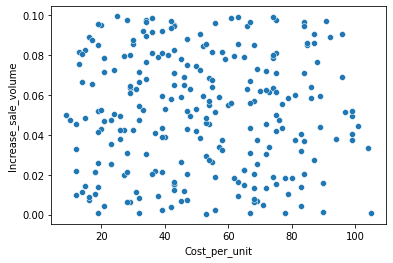

In [54]:
sns.scatterplot(df["Cost_per_unit"],df["Increase_sale_volume"])

In [ ]:
#cost and increase sale has negative corelatrion in the data

In [55]:
#avg price and avg profit has good corelation justify
df.columns

Index(['Products', 'Avg_Price_per_unit', 'Cost_per_unit',
       'Average_Profit_per_unit', 'Average_units_sold',
       'Incremental_acquisition', 'Increase_sale_volume'],
      dtype='object')

C:\Users\Aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Avg_Price_per_unit', ylabel='Average_Profit_per_unit'>

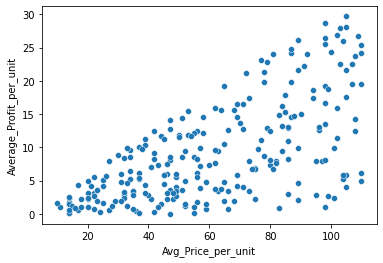

In [56]:
sns.scatterplot(df["Avg_Price_per_unit"],df["Average_Profit_per_unit"])

In [57]:
df.columns

Index(['Products', 'Avg_Price_per_unit', 'Cost_per_unit',
       'Average_Profit_per_unit', 'Average_units_sold',
       'Incremental_acquisition', 'Increase_sale_volume'],
      dtype='object')

C:\Users\Aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Avg_Price_per_unit', ylabel='Incremental_acquisition'>

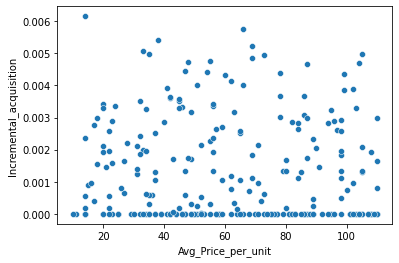

In [58]:
sns.scatterplot(df["Avg_Price_per_unit"],df["Incremental_acquisition"])

In [ ]:
#mostly we have to see in the data when average price of per unit increases but they declided or constant the incremental and acquisation see in the graph

In [ ]:
#as per understanding the data avg profit and cost shows a good relation or variable importance
#in future we have to make that project better  